In [7]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential#一个模型的结构，按顺序构成的模型，比较简单 一层接一层
from keras.layers import Dense,Activation#全连接层

from keras.optimizers import SGD

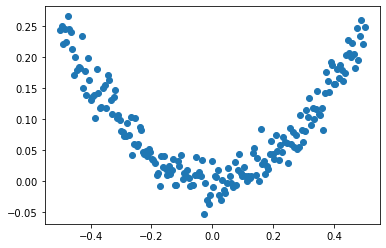

In [8]:
#生成数据
x_data = np.linspace(-0.5,0.5,200)
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data)+noise

plt.scatter(x_data,y_data)
plt.show()

cost: 0.01213369332253933
cost: 0.0005963253206573427
cost: 0.000535758794285357
cost: 0.0005309555563144386
cost: 0.0005297950701788068
cost: 0.0005288594984449446
cost: 0.000527966592926532
W: [[-0.1196274   0.12708223 -0.05165484 -0.06239239 -0.847873    0.40090027
  -0.07998803 -0.00830988 -0.5798742   0.12421341]] b: [ 0.03379129 -0.02704053  0.01641672  0.01435737  0.0197783  -0.01376423
  0.03837165  0.01261001 -0.01458761 -0.00339743]


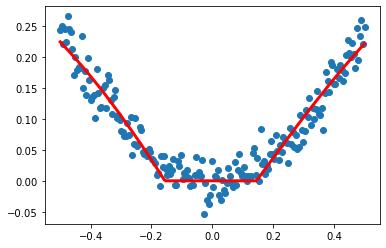

In [10]:
model = Sequential()
#1-10-1
model.add(Dense(units=10,input_dim=1))#没有使用激活函数，会默认使用一个线性激活函数
model.add(Activation('tanh'))#这是第一种加激活函数的方法
model.add(Dense(units=1))#这里因为上一步，可以不加输入
model.add(Activation('tanh'))

#第二种激活函数方法
model.add(Dense(units=10,input_dim=1,activation='relu'))
model.add(Dense(units=1,activation='relu'))

#为了修改学习率，可以导入SGD
sgd = SGD(lr=0.3)

model.compile(optimizer=sgd,loss='mse')

#训练
for step in range(3001):
    cost = model.train_on_batch(x_data,y_data)#每次训练一个批次
    if(step%500 ==0):
        print("cost:",cost)
#打印权值和偏置
W,b = model.layers[0].get_weights()
print("W:",W,"b:",b)

#x_data输入网络中得到预测值
y_pred = model.predict(x_data)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred,'r-',lw=3)
plt.show()
    